# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# Task 1
Link for stations distances: https://www.whatdotheyknow.com/request/distance_between_tfl_stations

In [75]:
def draw_network(stations, edges, lines, figsize):
    # Add nodes
    MyGraph = nx.Graph()
    # Blue line
    for station in stations:
        MyGraph.add_node(station['name'], npos=station['location'], ccn=station['line']['color'])
    
    # Add edges
    for edge in edges:
        MyGraph.add_edge(edge['source'], edge['target'], weight=edge['weight'], cce=edge['line']['color'])
        
    # Extrack attributes from the graph to dictionaries
    pos = nx.get_node_attributes(MyGraph, 'npos')
    nodecolour = nx.get_node_attributes(MyGraph, 'ccn')
    edgecolour = nx.get_edge_attributes(MyGraph, 'cce')
    edgeweight = nx.get_edge_attributes(MyGraph, 'weight')
    
    # Place the values from the dictionaries in lists
    NodeList = list(nodecolour.values())
    EdgeList = list(edgecolour.values())
        
    # Draw the graph's nodes and edges
    plt.figure(figsize=figsize)
    nodes = nx.draw_networkx_nodes(MyGraph, pos=pos, node_color=NodeList)
    nodes.set_edgecolor('black')
    nx.draw_networkx_edges(MyGraph, pos=pos, edge_color=EdgeList)
    nx.draw_networkx_edge_labels(MyGraph, pos=pos, edge_labels=edgeweight
                                 , font_size=15)
    
    # Display the name of the stations
    for station in stations:
        name = station['name']
        if name == "Tottenham Court Road":
            name = "Tottenham\nCourt Road"  # Wrap the text
            plt.text(station['label_position'][0], station['label_position'][1], name, 
                     rotation=station['rotation'], ha='center', va='center', fontsize=15)
        elif name == "Covent Garden":
            name = "Covent\nGarden" # Wrap the text
            plt.text(station['label_position'][0], station['label_position'][1], name, 
                     rotation=station['rotation'], fontsize=15)            
        else:
            plt.text(station['label_position'][0], station['label_position'][1], name, 
                     rotation=station['rotation'], fontsize=15)
    
    # Draw legend
    for line in lines:
        plt.plot([], [], color=line['color'], label=line['label'], marker='o', markeredgecolor='black', markeredgewidth='1', markersize=10, linewidth=2)
    legend = plt.legend(loc='lower right', fontsize=12, frameon=True, framealpha=1, borderpad=1, prop={'size':15})
    legend.get_frame().set_linewidth(2)
    # Set legend font color
    # for index, line in enumerate(lines):
    #     legend.get_texts()[index].set_color(line['color'])
    
    # Add "Key" text above the legend
    # Get the position of the legend
    legend_bbox = legend.get_window_extent().transformed(plt.gca().transData.inverted())
    plt.text((legend_bbox.x0 + legend_bbox.x1) / 2, legend_bbox.y1 + 1.5, "Key", fontsize=15, ha='center', va='center', weight='bold')
    
    # Visualize the graph
    plt.title('Public Transport Network of London', fontsize=30, fontweight='bold')
    plt.grid(axis='x', alpha=0)
    plt.grid(axis='y', alpha=0)
    plt.show()

In [76]:
def transform_longitude_latitude_to_coordinates(location):
    ratio = 1000
    root_location = (51.5032, -0.1536)
    return (np.array(location) - np.array(root_location))*ratio

In [77]:
piccadilly = {
        'label': 'Piccadilly',
        'color': 'blue'
}

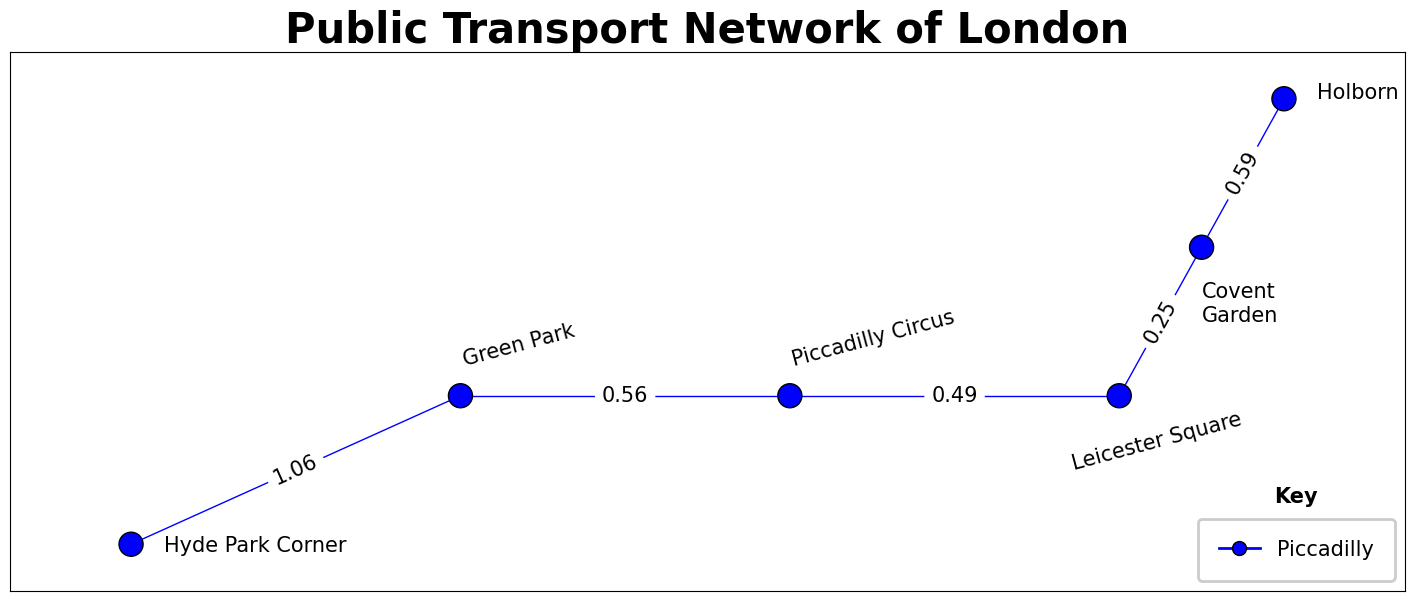

In [78]:
stations_piccadilly = [
    {
        'name': 'Hyde Park Corner',
        'location': (0,10),
        'label_position': (2, 9.5),
        'rotation': 0,
        'line': piccadilly
    },
    {
        'name': 'Green Park',
        'location': (20, 20),
        'label_position': (20, 22),
        'rotation': 15,
        'line': piccadilly
    },
    {
        'name': 'Piccadilly Circus',
        'location': (40, 20),
        'label_position': (40, 22),
        'rotation': 15,
        'line': piccadilly
    },
    {
        'name': 'Leicester Square',
        'location': (60, 20),
        'label_position': (57, 15),
        'rotation': 15,
        'line': piccadilly
    },
    {
        'name': 'Covent Garden',
        'location': (65, 30),
        'label_position': (65, 25),
        'rotation': 0,
        'line': piccadilly
    },
    {
        'name': 'Holborn',
        'location': (70, 40),
        'label_position': (72, 40),
        'rotation': 0,
        'line': piccadilly
    }
]

edges_piccadilly = [
    {
        'source': stations_piccadilly[0]['name'],
        'target': stations_piccadilly[1]['name'],
        'weight': 1.06,
        'line': piccadilly
    },
    {
        'source': stations_piccadilly[1]['name'],
        'target': stations_piccadilly[2]['name'],
        'weight': 0.56,
        'line': piccadilly
    },
    {
        'source': stations_piccadilly[2]['name'],
        'target': stations_piccadilly[3]['name'],
        'weight': 0.49,
        'line': piccadilly
    },
    {
        'source': stations_piccadilly[3]['name'],
        'target': stations_piccadilly[4]['name'],
        'weight': 0.25,
        'line': piccadilly
    },
    {
        'source': stations_piccadilly[4]['name'],
        'target': stations_piccadilly[5]['name'],
        'weight': 0.59,
        'line': piccadilly
    }
]
draw_network(stations=stations_piccadilly, edges=edges_piccadilly, lines=[piccadilly], figsize=(18, 7))

# Task 2

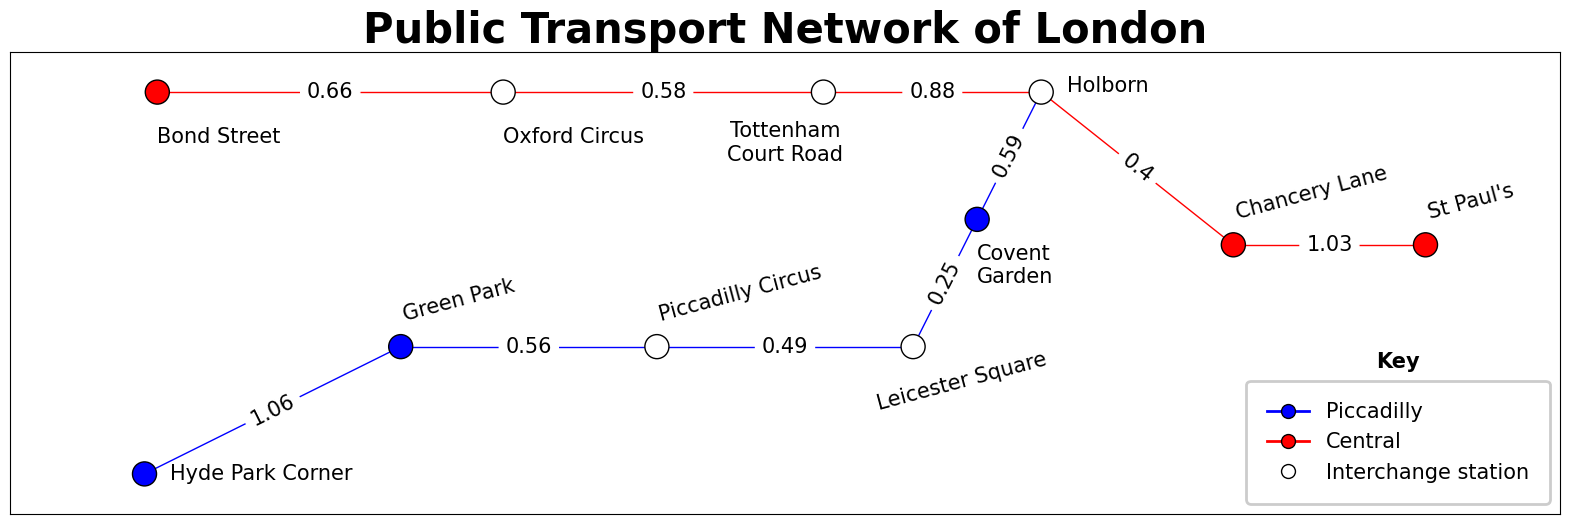

In [83]:
# Add a new line
central = {
    'label': 'Central',
    'color': 'red'
}
interchange = {
    'label': 'Interchange station',
    'color': 'white'
}

stations_piccadilly[-1]['line'] = interchange # Holborn station

# Add stations of that line
stations_central = [
    {
        'name': 'Tottenham Court Road',
        'location': (53, 40),
        'label_position': (50, 36),
        'rotation': 0,
        'line': interchange
    },
    {
        'name': 'Oxford Circus',
        'location': (28, 40),
        'label_position': (28, 36),
        'rotation': 0,
        'line': interchange
    },
    {
        'name': 'Bond Street',
        'location': (1, 40),
        'label_position': (1, 36),
        'rotation': 0,
        'line': central
    },
    {
        'name': 'Chancery Lane',
        'location': (85, 28),
        'label_position': (85, 30),
        'rotation': 15,
        'line': central
    },
    {
        'name': "St Paul's",
        'location': (100, 28),
        'label_position': (100, 30),
        'rotation': 15,
        'line': central
    }
]

# Add edges of that line
edges_central = [
    {
        'source': 'Tottenham Court Road',
        'target': 'Holborn',
        'weight': 0.88,
        'line': central
    },
    {
        'source': 'Tottenham Court Road',
        'target': 'Oxford Circus',
        'weight': 0.58,
        'line': central
    },
    {
        'source': 'Oxford Circus',
        'target': 'Bond Street',
        'weight': 0.66,
        'line': central
    },
    {
        'source': 'Holborn',
        'target': 'Chancery Lane',
        'weight': 0.4,
        'line': central
    },
    {
        'source': 'Chancery Lane',
        'target': "St Paul's",
        'weight': 1.03,
        'line': central
    }
]

# Draw the network
stations = stations_piccadilly + stations_central
edges = edges_piccadilly + edges_central
lines = [piccadilly, central, interchange]
draw_network(stations, edges, lines, figsize=(20, 6))

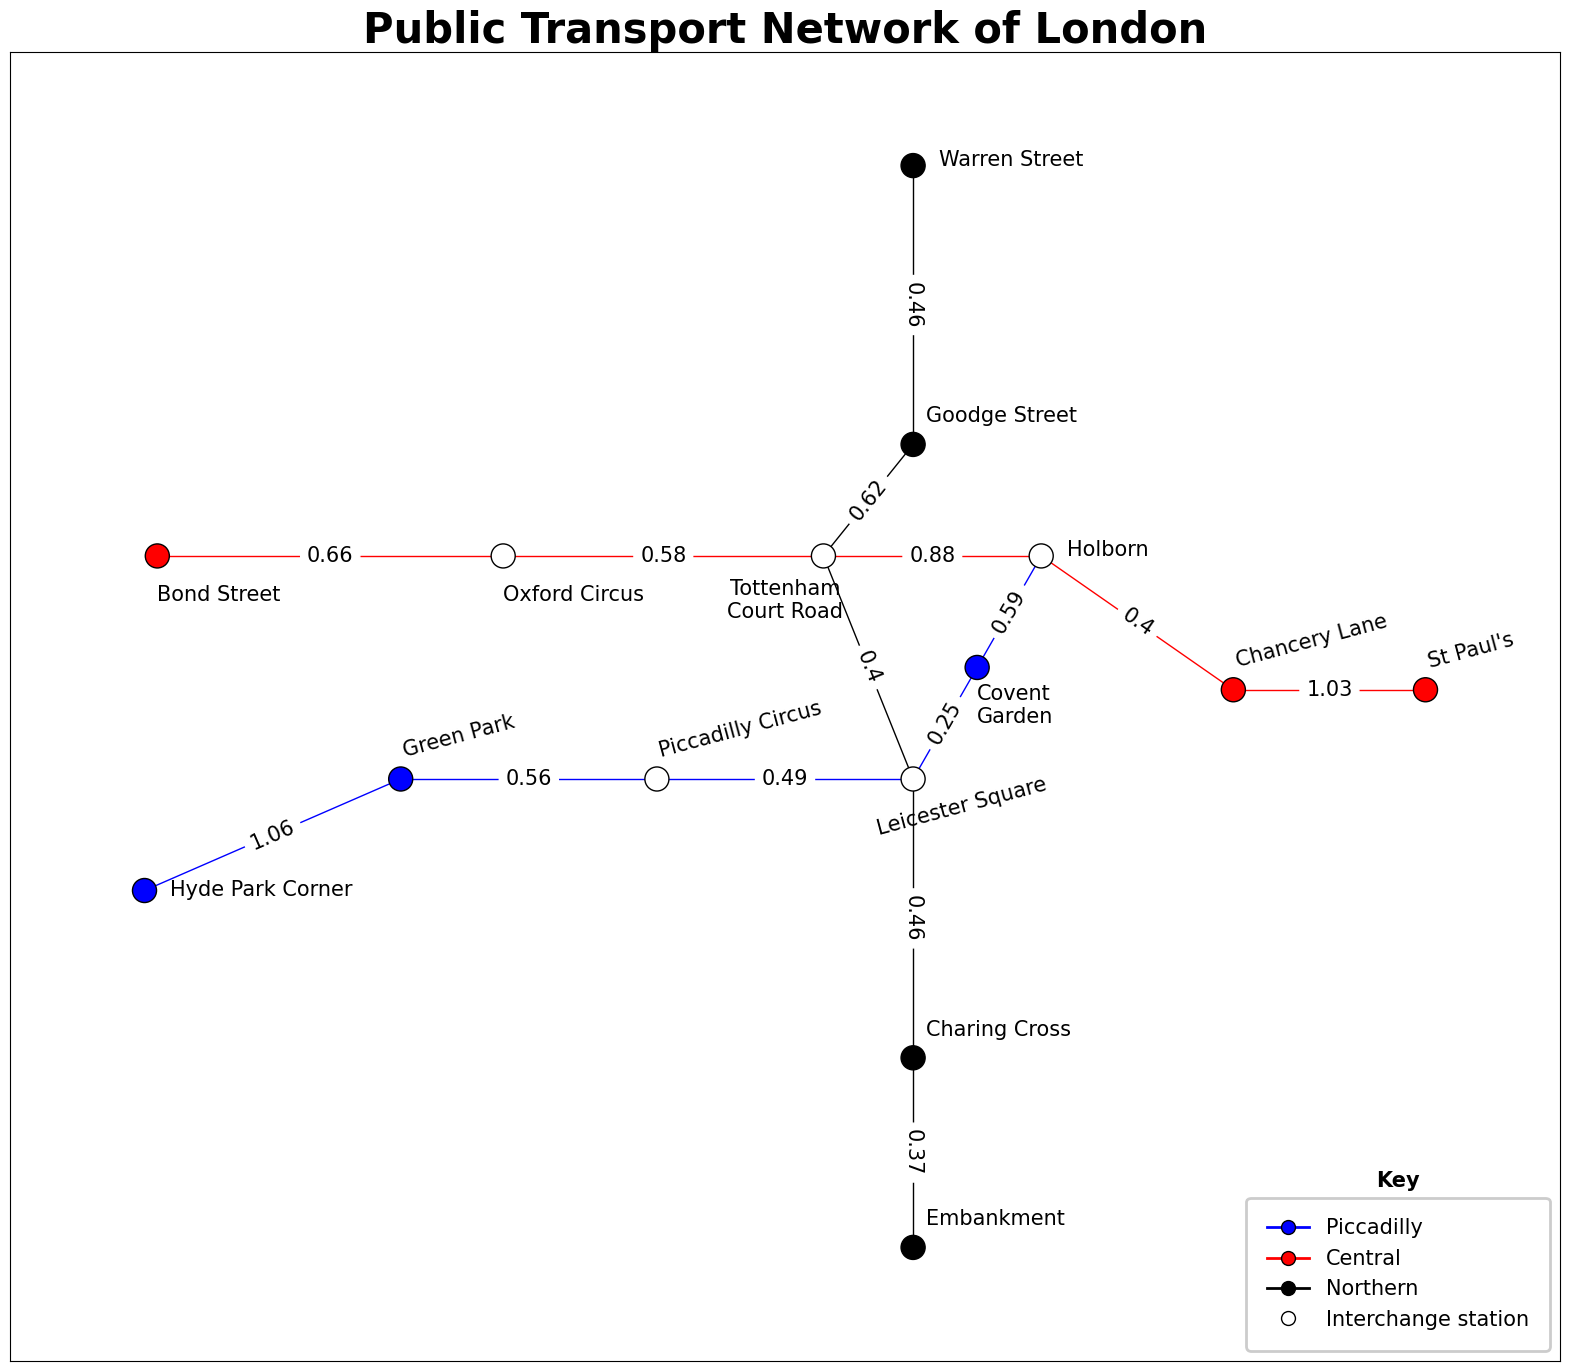

In [84]:
# Add a new line
northern = {
    'label': 'Northern',
    'color': 'black'
}

stations_piccadilly[-3]['line'] = interchange # Leicester Square station

# Add stations of that line
stations_northern = [
    {
        'name': 'Warren Street',
        'location': (60, 75),
        'label_position': (62, 75),
        'rotation': 0,
        'line': northern
    },
    {
        'name': 'Goodge Street',
        'location': (60, 50),
        'label_position': (61, 52),
        'rotation': 0,
        'line': northern
    },
    {
        'name': 'Charing Cross',
        'location': (60, -5),
        'label_position': (61, -3),
        'rotation': 0,
        'line': northern
    },
    {
        'name': 'Embankment',
        'location': (60, -22),
        'label_position': (61, -20),
        'rotation': 0,
        'line': northern
    }
]

# Add edges of that line
edges_northern = [
    {
        'source': 'Warren Street',
        'target': 'Goodge Street',
        'weight': 0.46,
        'line': northern
    },
    {
        'source': 'Goodge Street',
        'target': 'Tottenham Court Road',
        'weight': 0.62,
        'line': northern
    },
    {
        'source': 'Tottenham Court Road',
        'target': 'Leicester Square',
        'weight': 0.40,
        'line': northern
    },
    {
        'source': 'Charing Cross',
        'target': 'Leicester Square',
        'weight': 0.46,
        'line': northern
    },
    {
        'source': 'Charing Cross',
        'target': 'Embankment',
        'weight': 0.37,
        'line': northern
    }
]

# Draw the network
stations = stations_piccadilly + stations_central + stations_northern
edges = edges_piccadilly + edges_central + edges_northern
lines = [piccadilly, central, northern, interchange]
draw_network(stations, edges, lines, figsize=(20, 17))

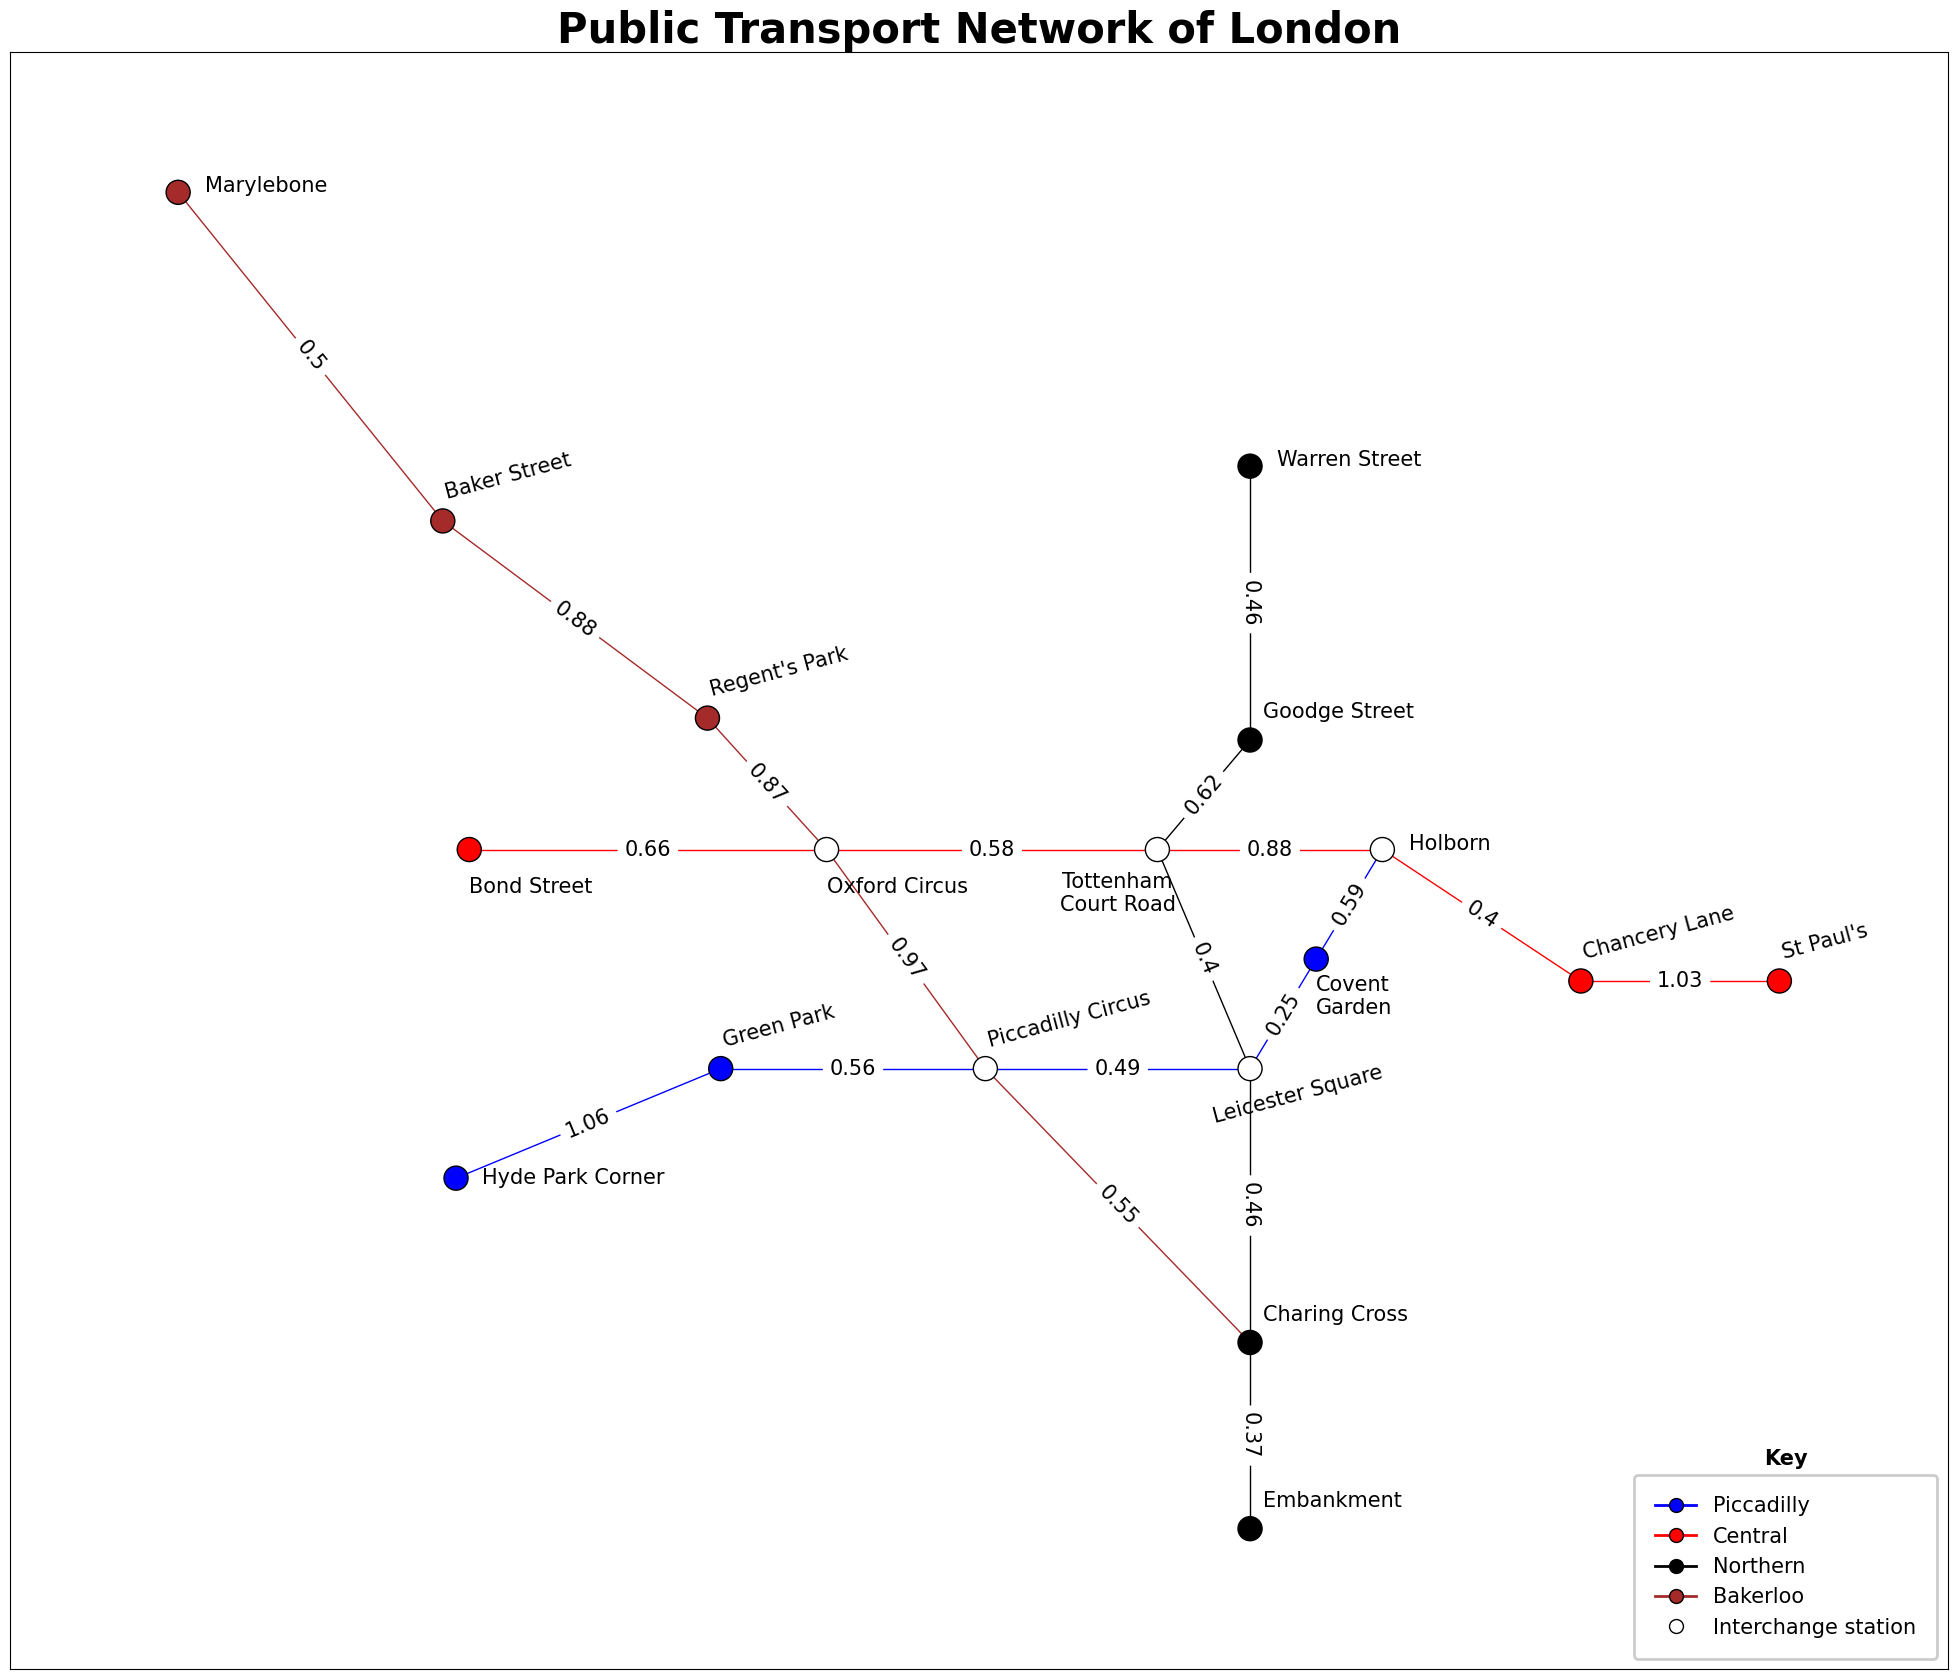

In [86]:
# Add a new line
bakerloo = {
    'label': 'Bakerloo',
    'color': 'brown'
}

stations_piccadilly[-4]['line'] = interchange # Piccadilly Circus station

# Add stations of that line
stations_bakerloo = [
    {
        'name': "Regent's Park",
        'location': (19, 52),
        'label_position': (19, 54),
        'rotation': 15,
        'line': bakerloo
    },
    {
        'name': 'Baker Street',
        'location': (-1, 70),
        'label_position': (-1, 72),
        'rotation': 15,
        'line': bakerloo
    },
    {
        'name': 'Marylebone',
        'location': (-21, 100),
        'label_position': (-19, 100),
        'rotation': 0,
        'line': bakerloo
    }
]

# Add edges of that line
edges_bakerloo = [
    {
        'source': 'Charing Cross',
        'target': 'Piccadilly Circus',
        'weight': 0.55,
        'line': bakerloo
    },
    {
        'source': 'Piccadilly Circus',
        'target': 'Oxford Circus',
        'weight': 0.97,
        'line': bakerloo
    },
    {
        'source': "Regent's Park",
        'target': 'Oxford Circus',
        'weight': 0.87,
        'line': bakerloo
    },
    {
        'source': 'Baker Street',
        'target': "Regent's Park",
        'weight': 0.88,
        'line': bakerloo
    },
    {
        'source': 'Marylebone',
        'target': 'Baker Street',
        'weight': 0.50,
        'line': bakerloo
    }
]

# Draw the network
stations = stations_piccadilly + stations_central + stations_northern + stations_bakerloo
edges = edges_piccadilly + edges_central + edges_northern + edges_bakerloo
lines = [piccadilly, central, northern, bakerloo, interchange]
draw_network(stations, edges, lines, figsize=(25, 21))

#### Notes:
* <b>The given distance between Hyde Park Corner station and Green Park in the image is different from the actual map.</b> It leads to an insensible location of the Baker Street station, where the distance between Baker Street and Regent's Park in the image looks way further than one between Regent's Park and Oxford Circus.
* <b>The location of Leicester Square given in the image is different from the actual map</b>, too.
* The Tottenham Court Road's positions on the <b>Central and the Northern lines should be different.</b>

# Task 3

In [87]:
def calculate_network_statistics(edges):
    # Extract the total length of the transport network
    length_total = 0
    for edge in edges:
        length_total += edge['weight']
    length_total = round(length_total, 2)

    # Extract the average distance between the stations
    length_average = length_total / len(edges)
    length_average = round(length_average, 2)

    # Extract the standard deviation of the distances between the stations
    length_std = 0
    for edge in edges:
        length_std += (edge['weight'] - length_average) ** 2
    length_std = np.sqrt(length_std / (len(edges) - 1))  # Using the formula for sample
    length_std = round(length_std, 2)
    
    return length_total, length_average, length_std

In [96]:
def draw_network(stations, edges, lines, figsize):
    # Add nodes
    MyGraph = nx.Graph()
    # Blue line
    for station in stations:
        MyGraph.add_node(station['name'], npos=station['location'], ccn=station['line']['color'])
    
    # Add edges
    for edge in edges:
        MyGraph.add_edge(edge['source'], edge['target'], weight=edge['weight'], cce=edge['line']['color'])
        
    # Extrack attributes from the graph to dictionaries
    pos = nx.get_node_attributes(MyGraph, 'npos')
    nodecolour = nx.get_node_attributes(MyGraph, 'ccn')
    edgecolour = nx.get_edge_attributes(MyGraph, 'cce')
    edgeweight = nx.get_edge_attributes(MyGraph, 'weight')
    
    # Place the values from the dictionaries in lists
    NodeList = list(nodecolour.values())
    EdgeList = list(edgecolour.values())
        
    # Draw the graph's nodes and edges
    plt.figure(figsize=figsize)
    nodes = nx.draw_networkx_nodes(MyGraph, pos=pos, node_color=NodeList)
    nodes.set_edgecolor('black')
    nx.draw_networkx_edges(MyGraph, pos=pos, edge_color=EdgeList)
    nx.draw_networkx_edge_labels(MyGraph, pos=pos, edge_labels=edgeweight
                                 , font_size=15)
    
    # Display the name of the stations
    for station in stations:
        name = station['name']
        if name == "Tottenham Court Road":
            name = "Tottenham\nCourt Road"  # Wrap the text
            plt.text(station['label_position'][0], station['label_position'][1], name, 
                     rotation=station['rotation'], ha='center', va='center', fontsize=15)
        elif name == "Covent Garden":
            name = "Covent\nGarden" # Wrap the text
            plt.text(station['label_position'][0], station['label_position'][1], name, 
                     rotation=station['rotation'], fontsize=15)            
        else:
            plt.text(station['label_position'][0], station['label_position'][1], name, 
                     rotation=station['rotation'], fontsize=15)
    
    # Draw legend
    for line in lines:
        plt.plot([], [], color=line['color'], label=line['label'], marker='o', markeredgecolor='black', markeredgewidth='1', markersize=10, linewidth=2)
    legend = plt.legend(loc='lower right', fontsize=12, frameon=True, framealpha=1, borderpad=1, prop={'size':15})
    legend.get_frame().set_linewidth(2)
    # Set legend font color
    # for index, line in enumerate(lines):
    #     legend.get_texts()[index].set_color(line['color'])
    
    # Add "Key" text above the legend
    # Get the position of the legend
    legend_bbox = legend.get_window_extent().transformed(plt.gca().transData.inverted())
    plt.text((legend_bbox.x0 + legend_bbox.x1) / 2, legend_bbox.y1 + 1.5, "Key", fontsize=15, ha='center', va='center', weight='bold')
    
    # Add a box with network information
    length_total, length_average, length_std = calculate_network_statistics(edges)
    textstr_bold = 'Descriptive Statistics'
    textstr = '\n'.join((
        f'Total Length: {length_total} km',
        f'Average Distance: {length_average} km',
        f'Standard Deviation: {length_std} km'
    ))
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5, linewidth=1.5)

    # Place the bold text
    plt.gca().text(0.05, 0.13, textstr_bold, transform=plt.gca().transAxes, fontsize=20,
                   verticalalignment='bottom', bbox=None, horizontalalignment='left', fontweight='bold')

    # Place the regular text below the bold text
    plt.gca().text(0.05, 0.05, textstr, transform=plt.gca().transAxes, fontsize=20,
                   verticalalignment='bottom', bbox=props, horizontalalignment='left')
    
    # Visualize the graph
    plt.title('Public Transport Network of London', fontsize=30, fontweight='bold')
    plt.grid(axis='x', alpha=0)
    plt.grid(axis='y', alpha=0)
    plt.show()

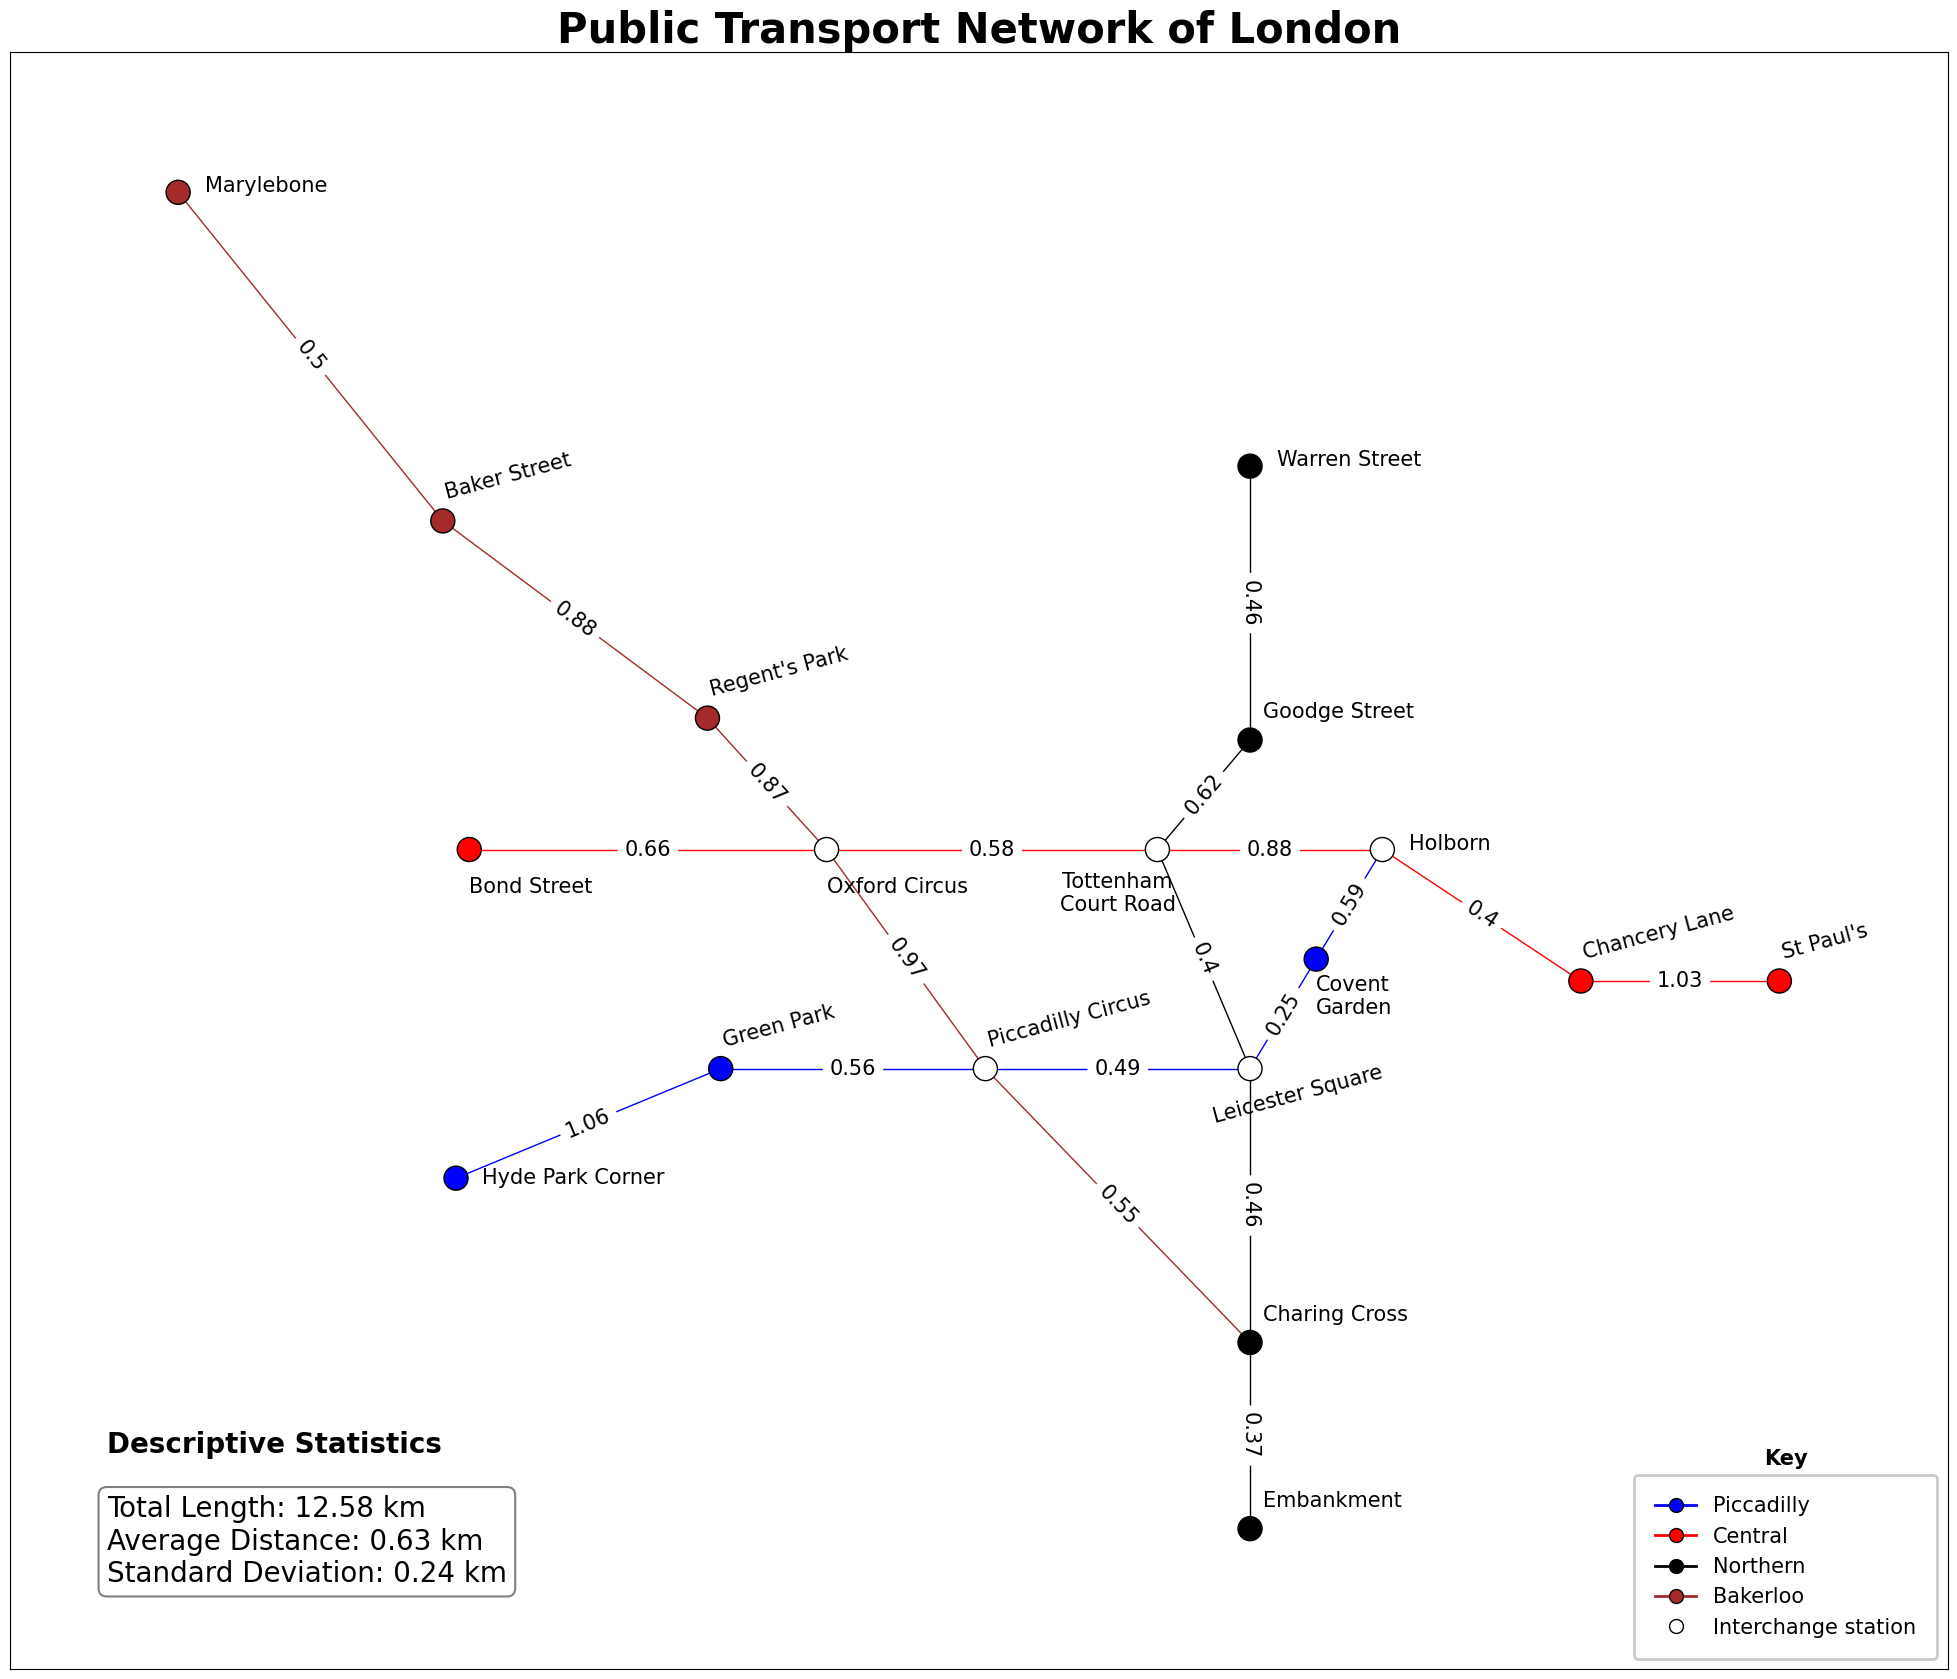

In [97]:
draw_network(stations, edges, lines, figsize=(25, 21))